# Visualisation: Chart formatting

By changing settings on the `matplotlib` `Axis` object, or providing arguments to the `pandas` plotting methods, we can can adjust the formatting of plots.

We'll use the same dataset used previously in this course.

In [1]:
import pandas as pd  # data tables
import numpy as np  # numerical operations
import matplotlib.pyplot as plt  # plotting

In [2]:
aggregation_output_path = "~/Downloads/referrals_by_priority.csv"
df = pd.read_csv(aggregation_output_path)
df['week_start'] = pd.to_datetime(df['week_start'])
df = df.set_index('week_start')
df.head(3)

,2 Week Wait,Routine,Urgent
week_start,,,
2019-10-31,217570,1050288,167886
2019-11-30,215739,1023472,168726
2019-12-31,209806,1009113,164598


Let's plot line charts of the data on a single axis

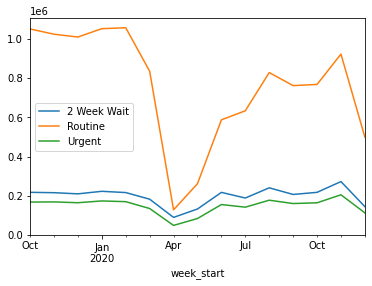

In [3]:
ax = df.plot()

---
## Line colours and styles

Matplotlib lets you specify named colours, like 'red' etc., but can use precise colour codes to match CF branding. In programming languages, colours are represented as *hex codes*. Lots of websites help you find the hex codes for colours you are looking for, e.g.

https://www.w3schools.com/colors/colors_picker.asp

You can also choose line styles:

|Linestyle | Description|
------------|-------------
|'-' or 'solid' | solid line|
|'--' or 'dashed' | dashed line|
|'-.' or 'dashdot' | dash-dotted line|
|':' or 'dotted' | dotted line

You can set colours and styles using the `color` and `style` arguments in the `plot` method. You then provide a list where each entry is the value for the data series you are plotting. Note that the order must be the same as the columns in the dataframe.
```python
    ax = df.plot(color=['red', 'blue', 'yellow'], style=['--', ':.', ':'])
```

In [4]:
# Hex codes (taken from the CF website HTML)
cf_teal = '#26a5b8'
cf_pink = '#dd0075'
cf_orange = "#ff9900"
cf_green = '#61B776'
cf_purple = "#612aa1"
cf_yellow = '#ffcc00'

Let's replot the referrals data, using CF branding colours and a variety of line styles.

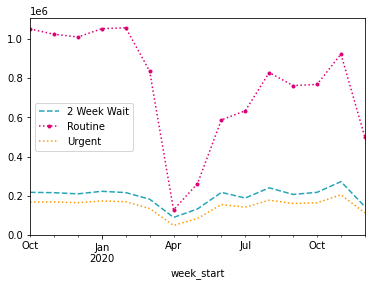

In [5]:
ax = df.plot(color=[cf_teal, cf_pink, cf_orange], style=['--', ':.', ':'])

---
## Legend

#### Changing names
Names can be changed with the `Axis.legend` method. The order of the names should be the same as they appear in the legend, which is the same as the order of the dataframe columns.
```python
    ax.legend(["new_name1", "new_name2", "new_name3"])
```
#### Legend position
By default, matplotlib puts the legend in the position with minimal overlap of lines on the plot. But CF style requires legends to be at the top right of the plot. The legend position can be changed with the `loc` argument.
```python
    ax.legend(loc='upper right')
```
#### Legend title
The legend can be given a title with the `title` argument. Sometimes pandas automatically adds a legend title when you don't want one, in which case you can set the title to an empty string.
```python
    ax.legend(title='My legend')
```

Let's move the legend to the top right of the chart, get rid of the legend title and make the series names more explicit, like "Routine referrals" etc.

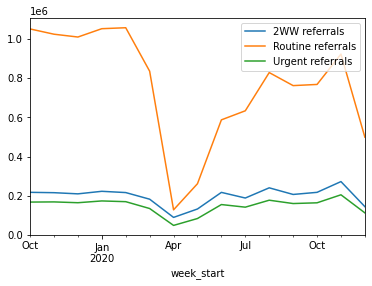

In [6]:
ax = df.plot()
ax.legend(["2WW referrals", "Routine referrals", "Urgent referrals"], 
          loc="upper right", 
          title="")

### Exercise

Combine what you've learned so far to make a chart from the aggregated referrals data.

* Use CF colours
* Use a different line style for each data series
* Add a legend with renamed series names, at the top right of the plot

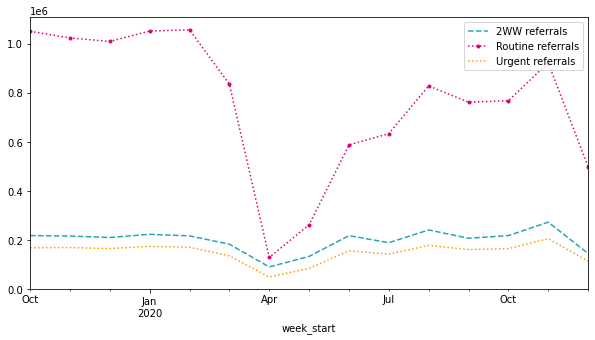

In [7]:
# part 1 solution
ax = df.plot(color=[cf_teal, cf_pink, cf_orange], # CF branding
             style=['--', ':.', ':'],
             figsize=[10, 5])   # W = 2H
ax.legend(["2WW referrals", "Routine referrals", "Urgent referrals"], 
          loc="upper right")

---
## Figure sizing

There are two ways to control the size/shape of your figure.

We can adjust the size of the plot using the `figsize` argument in the `plot` method call, which accepts a list comprising integers representing the width and height for the figure in inches.
```python
    ax = df.plot(figsize=[12, 3])
```
Alternatively, you can adjust the extent of the axes. The `set_xlim` and `set_ylim` methods on `Axis` let you control the points where the axis starts and stops.
```python
    ax.set_ylim([0, 2000000])
```

For time series data, we can set limits using string (i.e. text) representations of dates:

```python
    ax.set_xlim(['2020-01-01', '2020-12-31'])
```

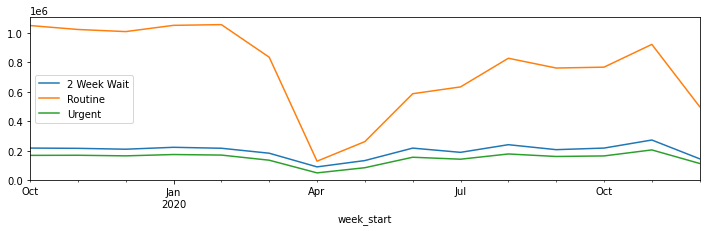

In [8]:
ax = df.plot(figsize=[12, 3])

(597.0, 617.0)

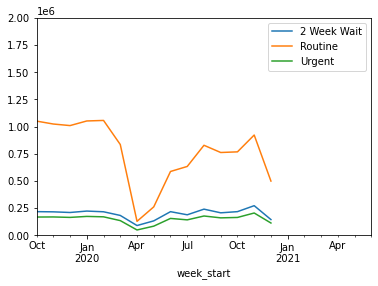

In [9]:
ax = df.plot()
two_million = 2 * 10**6
ax.set_ylim([0, two_million])
ax.set_xlim(['2019-10-01', '2021-06-01'])

---
## Labels

You can set exact values for the points along each axis that are marked by ticks and annotated with tick labels.
```python
    ax.set_yticks([0, 10, 20])
```
And you can set the tick labels with exact values, which match the number of ticks:
```python
    ax.set_yticklabels(['Zero', 'Ten', 'Twenty'])
```

You can also change the y axis of your plot to rounded values, e.g. labelled with "0", "0.5m" and "1m" for millions. Remember 1 million is $10^6$, which in python is represented as `10**6`.

[Text(0, 0.0, '0'), Text(0, 500000.0, '0.5m'), Text(0, 1000000.0, '1m')]

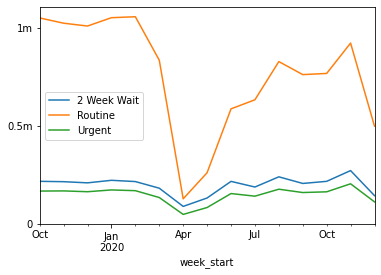

In [10]:
ax = df.plot()
one_million = 10**6
ax.set_yticks([0, one_million/2, one_million])
ax.set_yticklabels(['0', '0.5m', '1m'])

You can set labels for the axes and the chart title with the following methods. Set them to an empy string if you just want to get rid of them.

```python
ax.set_xlabel('my x label')
ax.set_ylabel('my y label')
ax.set_title("my chart title")
```

Let's change the labels and title to something sensible.

Text(0.5, 1.0, 'Referrals fell substantially in April 2020')

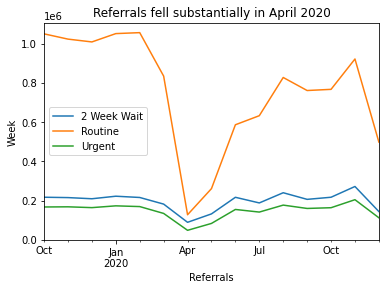

In [11]:
ax = df.plot()
ax.set_xlabel('Referrals')
ax.set_ylabel('Week')
ax.set_title("Referrals fell substantially in April 2020")

---
## Fonts

Fonts can't be changed by changing settings on `Axis` objects directly. Instead we can update the settings matplotlib itself.

The matplotlib default font (DejaVu Sans) is sufficiently similar to CF's house style font (Calibri) that you probably won't need to change it. It may be useful to change the size though:

```python
    plt.rcParams.update({'font.size': 22, 'font.family': 'Times'})
```

You can return to default values with:

```python
    plt.rcParams.update({'font.size': 12, 'font.family': 'DejaVu Sans'})
```

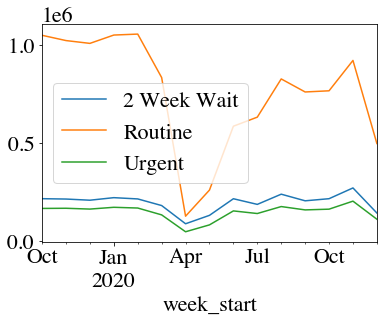

In [12]:
plt.rcParams.update({'font.size': 22, 'font.family': 'Times'})
ax = df.plot()

Remember this is a global setting, so will affect other plots in the notebook. Let's change the fonts back to defaults.

In [13]:
plt.rcParams.update({'font.size': 12, 'font.family': 'DejaVu Sans'})

### Exercise

Make some improvements to the chart you started above, using what you've learned since the last exercise. It may be easier to copy the code you wrote for that exercise and paste here to improve on it.

* Set the chart size to be twice as wide as it is tall
* Hide the x axis label
* Set the title to something descriptive

Optional:

* Set the y ticks to be in millions

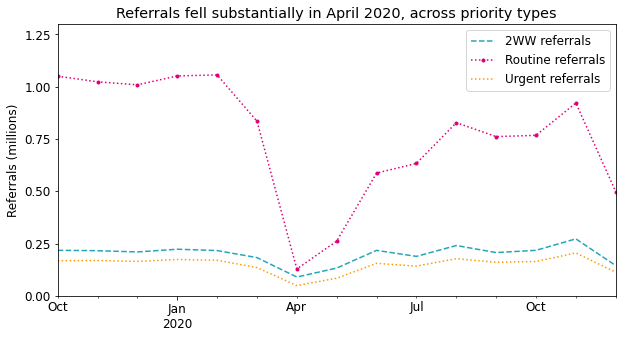

In [14]:
# part 1 solution
ax = df.plot(color=[cf_teal, cf_pink, cf_orange], # CF branding
             style=['--', ':.', ':'],
             figsize=[10, 5])   # W = 2H
ax.legend(["2WW referrals", "Routine referrals", "Urgent referrals"], 
          loc="upper right")

# part 2 solution
ax.set_ylim([0, 1.3 * 10**6])
ax.set_xlabel('')  # hide x axis label
ax.set_ylabel('Referrals (millions)')
ax.set_title('Referrals fell substantially in April 2020, across priority types')

y_ticks = [0, 0.25, 0.5, 0.75, 1, 1.25]  # y ticks in millions (optional)
y_ticks_millions = [x * 10**6 for x in y_ticks]
ax.set_yticks(y_ticks_millions)  
ax.set_yticklabels([f'{x:.2f}' for x in y_ticks]);